<a href="https://colab.research.google.com/github/Manireddy69/DL/blob/main/intro_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf

In [13]:
# prompt: import required libraires for deep learning

import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
red_wine = pd.read_csv('/content/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
from keras import layers
model = keras.Sequential([layers.Dense(units =1, input_shape = [11])])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.weights

[<Variable path=sequential/dense/kernel, shape=(11, 1), dtype=float32, value=[[ 0.13720942]
  [-0.15638602]
  [ 0.0669806 ]
  [ 0.30738586]
  [ 0.2881106 ]
  [-0.68383867]
  [ 0.05870432]
  [-0.06601208]
  [-0.64109504]
  [-0.28823236]
  [ 0.08055562]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.]>]

In [18]:
w,b = model.weights

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


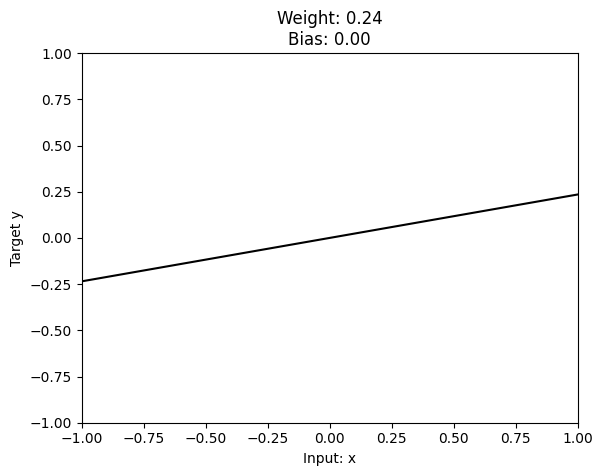

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [20]:
from IPython.display import display


df_train = red_wine.sample(frac = 0.7, random_state = 0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [21]:
#normalize the values on Scale to [0,1]
max = df_train.max()
min = df_train.min()
df_train = (df_train - min) / (max - min)
df_valid = (df_valid - min) / (max - min)

In [22]:
X_train = df_train.drop('quality', axis = 1)
X_valid = df_valid.drop('quality', axis = 1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [24]:
X_train.shape

(1119, 11)

In [25]:
model = keras.Sequential([
    layers.Dense(512,activation = 'relu', input_shape = [11]),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer= 'adam',
              loss = 'mae')

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.3499 - val_loss: 0.1342
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1441 - val_loss: 0.1240
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1279 - val_loss: 0.1184
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1200 - val_loss: 0.1143
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1169 - val_loss: 0.1090
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1139 - val_loss: 0.1059
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1080 - val_loss: 0.1030
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1080 - val_loss: 0.1038
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1044 - val_loss: 0.1015


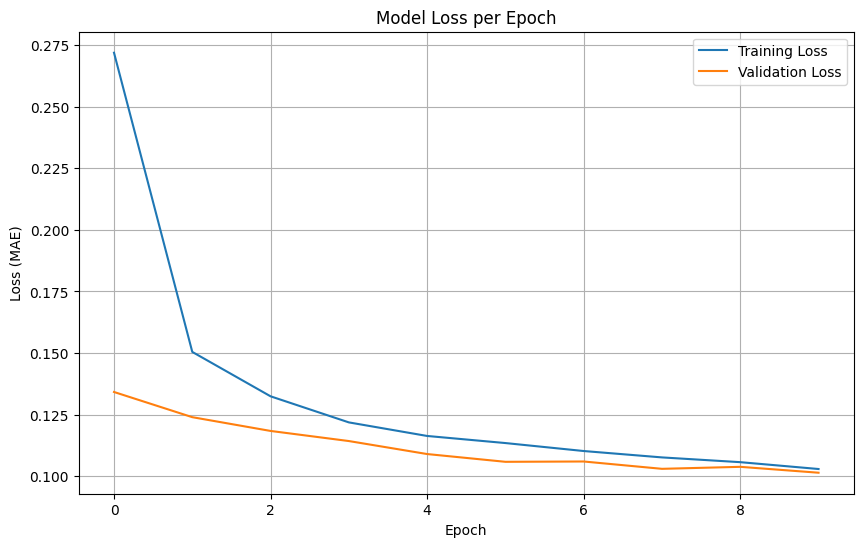

In [28]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001, # minimium amount of change to count as an improvement
    patience = 20, # how many epochs to wait before stopping
    restore_best_weights = True,
)

In [30]:
history = model.fit(X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    batch_size=256,
                    epochs=200,
                    callbacks=[early_stopping],
                    verbose = 0)


Minimum validation loss: 0.0938


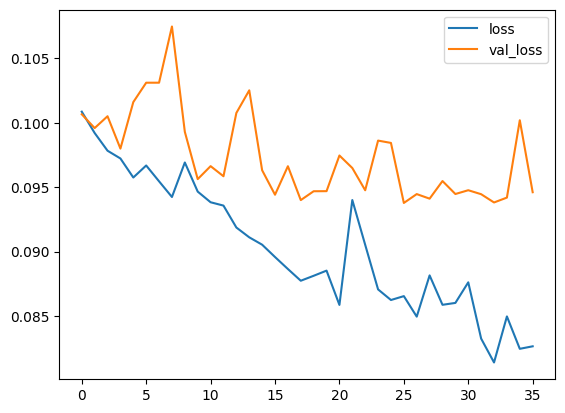

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))